# Twitter Sentiment Analysis

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,TweetTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PUJA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading DataFrame

In [2]:
df=pd.read_csv('twitter_training.csv',header= None,names=['id','information','sentiment','text'])

In [3]:
df.head()

,id,information,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           74682 non-null  int64 
 1   information  74682 non-null  object
 2   sentiment    74682 non-null  object
 3   text         73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df.describe(include=object).T

,count,unique,top,freq
information,74682,32,TomClancysRainbowSix,2400
sentiment,74682,4,Negative,22542
text,73996,69491,"At the same time, despite the fact that there ...",172


### Checking Nan or Duplicated Values

In [6]:
df.text.isnull().sum()

686

In [7]:
df.dropna(axis=0,inplace=True)

## Information

In [8]:
df['information'].value_counts()

MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                       

## sentiment

In [9]:
df['sentiment'].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: sentiment, dtype: int64

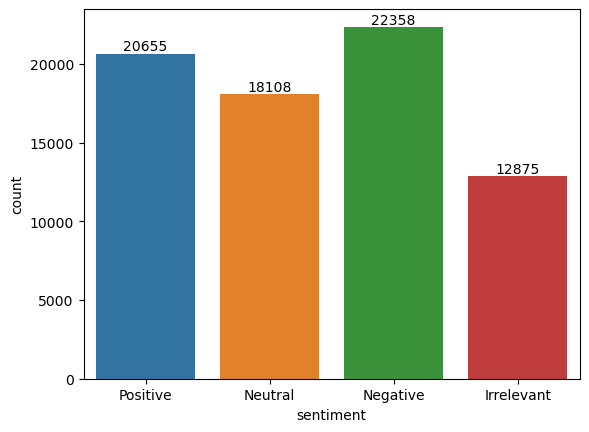

In [10]:
ax=sns.countplot(data=df,x='sentiment');
for container in ax.containers:
    ax.bar_label(container)

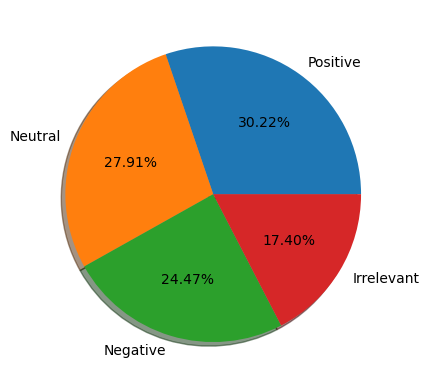

In [11]:
plt.pie(df.sentiment.value_counts(),autopct="%1.2f%%",shadow=True,labels=df.sentiment.unique());

## Information with its Sentiment Count

In [12]:
df.groupby(['information','sentiment'])[['id']].count()

id
information     sentiment       
Amazon          Irrelevant   186
                Negative     575
                Neutral     1207
                Positive     308
ApexLegends     Irrelevant   192
...                          ...
Xbox(Xseries)   Positive     785
johnson&johnson Irrelevant   197
                Negative     845
                Neutral     1013
                Positive     269

[128 rows x 1 columns]

## Information with Sentiment

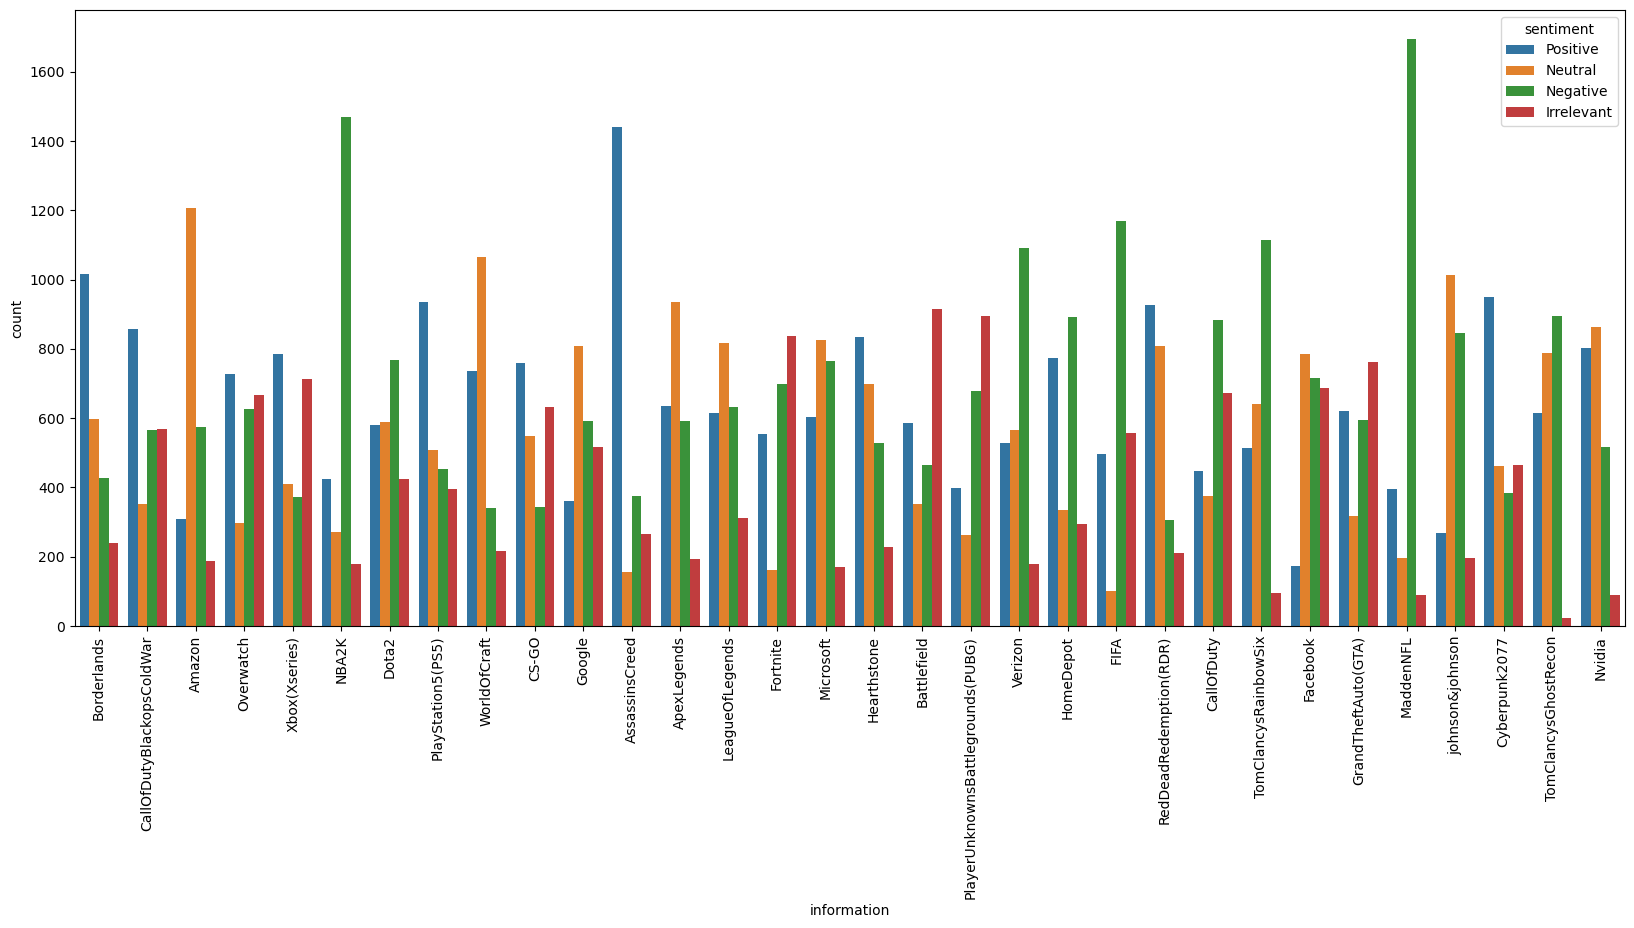

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='information',hue='sentiment')
plt.xticks(rotation=90);

In [9]:
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

In [10]:
def cleantext(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@[A-Za-z0-9()]+','',text)
    tokens = tknzr.tokenize(text.lower())
    ftoken = [t for t in tokens if(t.isalpha())]
    stop = stopwords.words("english")
    ctoken = [t for t in ftoken if(t not in stop)]
    lemma = WordNetLemmatizer()
    ltoken = [lemma.lemmatize(t) for t in ctoken]
    return " ".join(ltoken)

In [11]:
df["clean_text"]=df["text"].apply(cleantext)

In [62]:
for i in df['clean_text'].values[-10:]:
    print(i)

let elite go unnoticed nvidia highlight automatically record best moment fennitegame gfn
let elim go unnoticed nvidia highlight automatically record best shot video gfn share
let information elim go unnoticed nvidia highlight automatically record three best moment gfn share
elim nvidia highlight picture reveals best moment gfn share
realized window partition mac like year behind nvidia driver idea notice
realized window partition mac like year behind nvidia driver idea notice
realized mac window partition year behind nvidia driver idea notice
realized window partition mac year behind nvidia driver idea notice
realized window partition mac like year behind nvidia driver car fucking idea ever notice
like window partition mac like year behind driver idea notice


In [18]:
df.head()

,id,information,sentiment,text,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming border kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderland murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder


In [63]:
str_null=[]
for indx,ids,info,lbl,msg,msg1 in df.itertuples():
    #print(msg)
    if type(msg1)==str:
        if msg1.isspace():
            #print(msg)
            str_null.append(indx)

In [64]:
df.isnull().sum()

id             0
information    0
sentiment      0
text           0
clean_text     0
dtype: int64

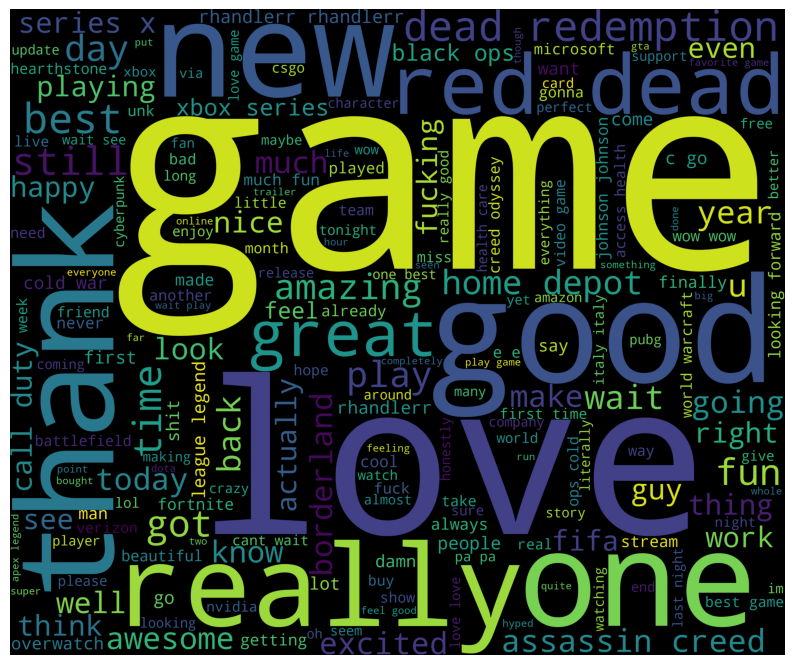

In [21]:
wc=WordCloud(background_color='black',width=3000, height=2500)

wc.generate(" ".join(df[df["sentiment"]=="Positive"]["clean_text"]))
plt.figure(figsize=(10,10))
#img=word.to_image()
#img.show()
plt.imshow(wc)
plt.axis("off")
plt.show()

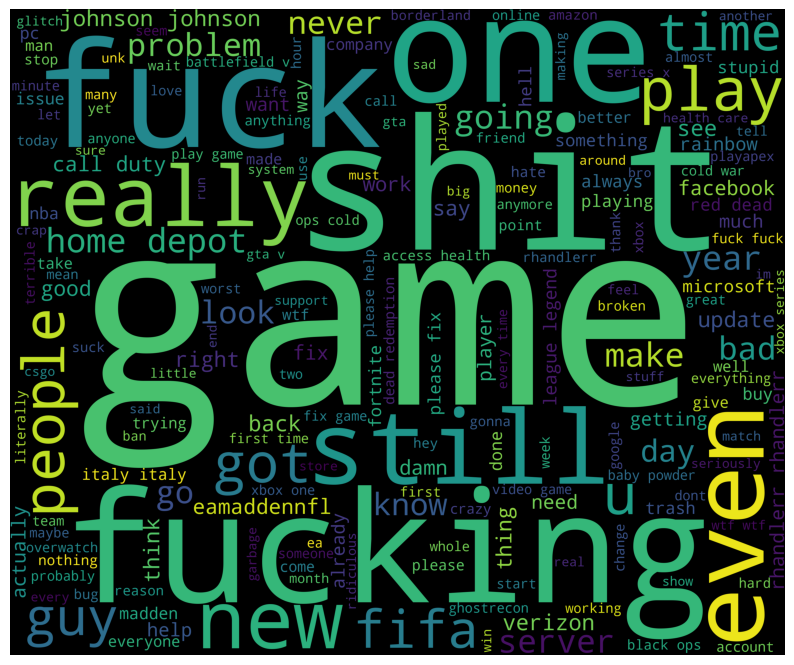

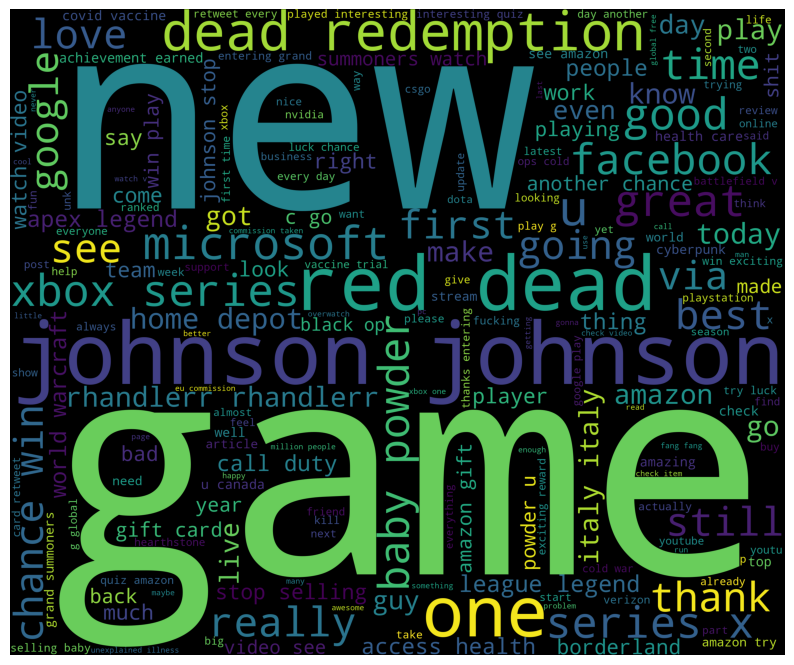

In [23]:
wc.generate(" ".join(df[df["sentiment"]=="Neutral"]["clean_text"]))
plt.figure(figsize=(10,10))
#img=word.to_image()
#img.show()
plt.imshow(wc)
plt.axis("off")
plt.show()

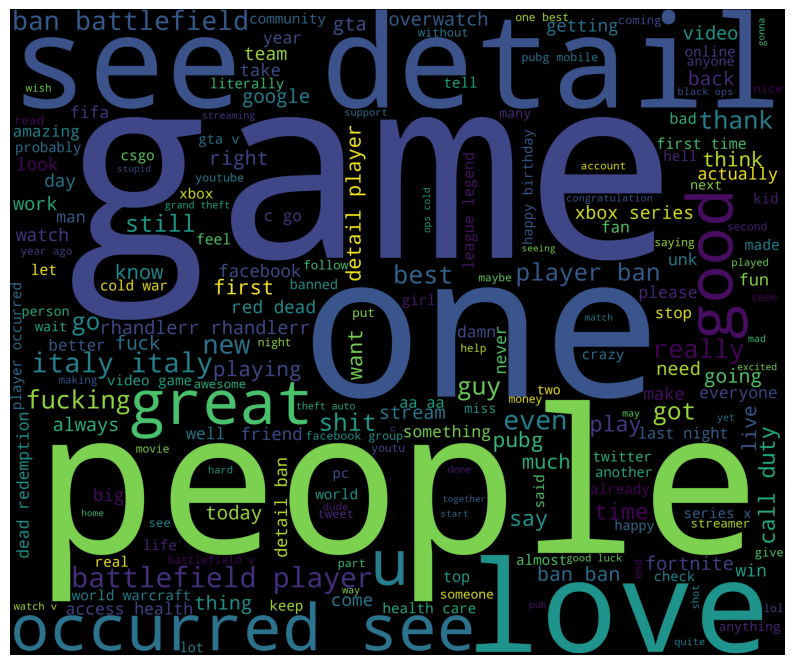

In [24]:
wc.generate(" ".join(df[df["sentiment"]=="Irrelevant"]["clean_text"]))
plt.figure(figsize=(10,10))
#img=word.to_image()
#img.show()
plt.imshow(wc)
plt.axis("off")
plt.show()

In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['sentiment']=oe.fit_transform(df[['sentiment']])

In [13]:
x=df['clean_text']
y=df['sentiment']

In [14]:
y.value_counts()

1.0    22358
3.0    20655
2.0    18108
0.0    12875
Name: sentiment, dtype: int64

In [15]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv=CountVectorizer(stop_words='english',min_df=10,max_features=4000)
# # x=cv.fit_transform(x).toarray()

In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,stratify=y)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english',ngram_range=(1,4),min_df=10)
xtraincv=cv.fit_transform(xtrain).toarray()
xtestcv=cv.transform(xtest).toarray()

In [71]:
xtestcv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [72]:
len(cv.get_feature_names_out())

7545

In [18]:
def mymodel(model):
    model.fit(xtraincv,ytrain)
    ypred = model.predict(xtestcv)
    
    train = model.score(xtraincv,ytrain)
    test = model.score(xtestcv,ytest)
    
    print(f"Training Accuracy:- {train}\n Testing Accuracy:-  {test}")
    print(classification_report(ytest,ypred))
    sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap="YlGnBu")
    plt.xlabel('Predicted Label',size=15)
    plt.ylabel('True Lable',size=15)
    
    return model

In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomTreesEmbedding,RandomForestClassifier

Training Accuracy:- 0.8007799679518118
 Testing Accuracy:-  0.7119239605387631
              precision    recall  f1-score   support

         0.0       0.73      0.56      0.63      3863
         1.0       0.75      0.78      0.76      6707
         2.0       0.72      0.65      0.68      5432
         3.0       0.67      0.79      0.72      6197

    accuracy                           0.71     22199
   macro avg       0.72      0.69      0.70     22199
weighted avg       0.71      0.71      0.71     22199



LogisticRegression(C=1, max_iter=200, solver='liblinear')

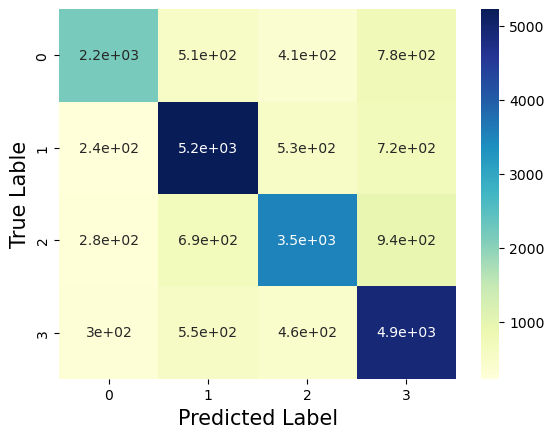

In [75]:
lr=LogisticRegression(C=1, solver="liblinear",max_iter=200)
mymodel(lr)

Training Accuracy:- 0.6788617101376527
 Testing Accuracy:-  0.63178521555025
              precision    recall  f1-score   support

         0.0       0.60      0.52      0.56      3863
         1.0       0.70      0.71      0.70      6707
         2.0       0.72      0.42      0.53      5432
         3.0       0.56      0.80      0.66      6197

    accuracy                           0.63     22199
   macro avg       0.64      0.61      0.61     22199
weighted avg       0.65      0.63      0.62     22199



BernoulliNB()

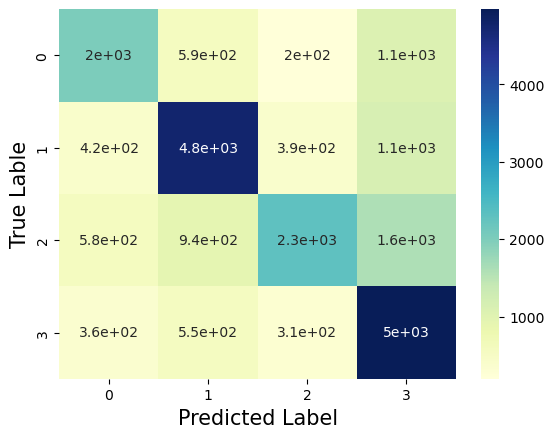

In [76]:
bnb=BernoulliNB()
mymodel(bnb)

Training Accuracy:- 0.6787651794505474
 Testing Accuracy:-  0.6349385107437272
              precision    recall  f1-score   support

         0.0       0.60      0.53      0.56      3863
         1.0       0.64      0.76      0.69      6707
         2.0       0.68      0.46      0.55      5432
         3.0       0.63      0.73      0.67      6197

    accuracy                           0.63     22199
   macro avg       0.63      0.62      0.62     22199
weighted avg       0.64      0.63      0.63     22199



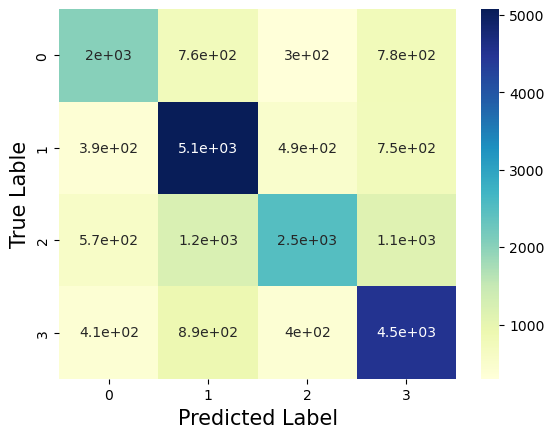

In [77]:
mln=mymodel(MultinomialNB())

Training Accuracy:- 0.9556538023437651
 Testing Accuracy:-  0.8576512455516014
              precision    recall  f1-score   support

         0.0       0.89      0.80      0.84      3863
         1.0       0.89      0.88      0.88      6707
         2.0       0.88      0.82      0.85      5432
         3.0       0.79      0.91      0.85      6197

    accuracy                           0.86     22199
   macro avg       0.86      0.85      0.86     22199
weighted avg       0.86      0.86      0.86     22199



RandomForestClassifier()

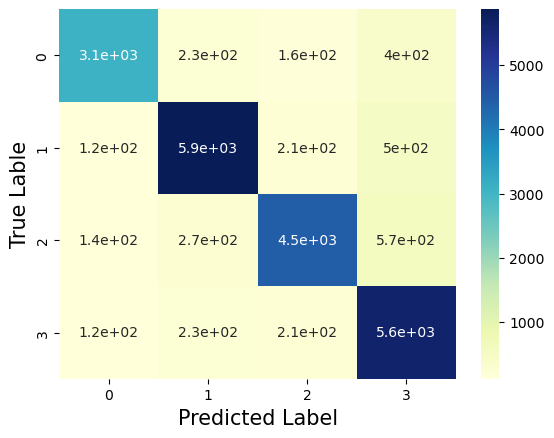

In [80]:
mymodel(RandomForestClassifier())

In [20]:
from xgboost import XGBClassifier

In [21]:
XGB=XGBClassifier(objective="multi:softmax",n_estimators=1000,colsample_bytree=0.6, subsample=0.6)

In [ ]:
mymodel(XGB)